# ft_linear_regression - Bonus Analysis

**Purpose:** Visualization and evaluation of the trained linear regression model

**Bonus components:**
1. Data visualization (scatter plot)
2. Regression line plotting
3. Model performance metrics (MSE, MAE, R²)
4. Gradient descent convergence analysis

---

## 1. Setup & Imports

**Libraries used:**
- `pandas` - Data loading and manipulation
- `numpy` - Numerical operations
- `matplotlib` - Visualization and plotting

---

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Dataset
Load the training data and extract features (mileage) and target (price).

-------

In [ ]:
# Load dataset

data = pd.read_csv("./data/raw/data.csv")

km = data["km"].values
price = data["price"].values

# Display dataset info
print(f"Dataset loaded successfully")
print(f"Number of samples: {len(km)}")
print(f"First 5 samples:")
print(f"  Mileage (km): {km[:5]}")
print(f"  Price: {price[:5]}")

Dataset loaded successfully
Number of samples: 24
First 5 samples:
  Mileage (km): [240000 139800 150500 185530 176000]
  Price: [3650 3800 4400 4450 5250]


## 3. Quick dataset summary

-----

In [ ]:
# Quick dataset summary

print(f"Dataset shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print(f"\nPrice statistics:")
print(f"  Min: {price.min()}, Max: {price.max()}, Mean: {price.mean():.0f}")
print(f"\nMileage statistics:")
print(f"  Min: {km.min()}, Max: {km.max()}, Mean: {km.mean():.0f}")

Dataset shape: (24, 2)
Columns: ['km', 'price']

Price statistics:
  Min: 3650, Max: 8290, Mean: 6332

Mileage statistics:
  Min: 22899, Max: 240000, Mean: 101066


## 4. Visualize Dataset (Bonus 1)

Scatter plot showing the relationship between mileage and price. This fulfills **Bonus requirement 1**: *"Plotting the data into a graph to see their distribution."*

------

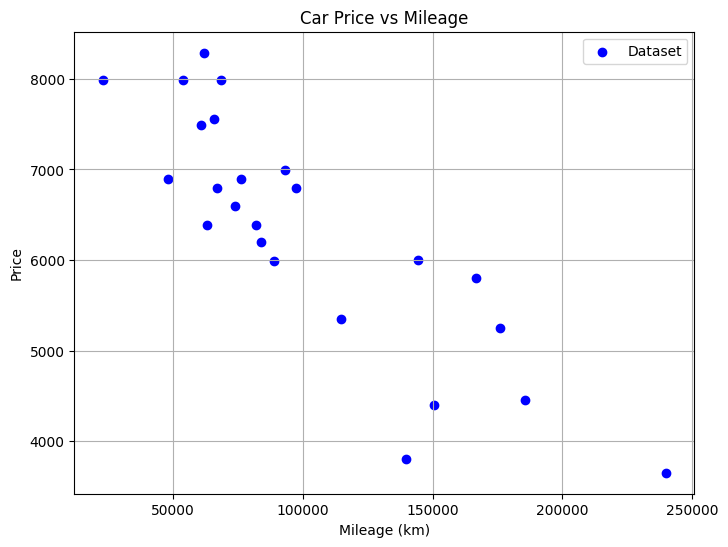

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(km, price, color="blue", label="Dataset")
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.title("Car Price vs Mileage")
plt.legend()
plt.grid(True)
plt.show()

## 5. Load Trained Model

Load the θ (theta) parameters learned by `train.py`. These define the regression line:

**Formula:** `price = θ₀ + θ₁ × (mileage / 100,000)`

--------

In [40]:
with open("./thetas.txt", "r") as f:
    theta0 = float(f.readline())
    theta1 = float(f.readline())

print("Trained model parameters:")
print(f"  θ₀ (intercept): {theta0:.2f}")
print(f"  θ₁ (slope): {theta1:.2f}")
print(f"\nInterpretation:")
print(f"  Every 100,000 km reduces price by {abs(theta1):.2f}")

Trained model parameters:
  θ₀ (intercept): 6770.87
  θ₁ (slope): -644.53

Interpretation:
  Every 100,000 km reduces price by 644.53


### 6. Scale Mileage
Apply the same scaling factor used during training (÷100,000).

--------

In [ ]:
# Scale mileage using same factor as training
# (train.py divided by 100,000 for numerical stability)

km_scaled = km / 100000

print(f"Mileage scaled successfully")
print(f"Example: {km[0]:,} km → {km_scaled[0]:.5f} (scaled)")

Mileage scaled successfully
Example: 240,000 km → 2.40000 (scaled)


### 7. Plot Regression Line (Bonus 2)
Visualize the trained model's predictions against actual data points.

-------

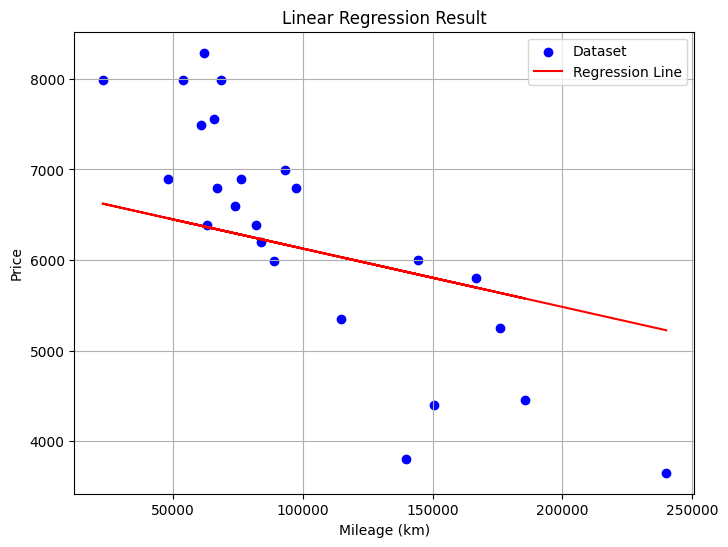

In [31]:
# Predict prices using the trained model
predicted_price = theta0 + theta1 * km_scaled

plt.figure(figsize=(8, 6))
plt.scatter(km, price, color="blue", label="Dataset")
plt.plot(km, predicted_price, color="red", label="Regression Line")
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.title("Linear Regression Result")
plt.legend()
plt.grid(True)
plt.show()


## 8. Model Performance Metrics (Bonus 3)

Calculate precision metrics to quantify model accuracy. This fulfills **Bonus requirement 3**: *"A program that calculates the precision of your algorithm."*

----

In [42]:
# Calculate Mean Squared Error (MSE)
m = len(price)
mse = (1 / m) * np.sum((predicted_price - price) ** 2)

print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"  (Average squared distance from predictions to actual prices)")

Mean Squared Error (MSE): 1,089,303.75
  (Average squared distance from predictions to actual prices)


### 9. Mean Absolute Error (MAE)
Measures average prediction error in the same units as price.

----

In [33]:
# Mean Absolute Error (easier to interpret)
mae = (1 / m) * np.sum(np.abs(predicted_price - price))

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 835.19


## 10. Gradient Descent Convergence Analysis

Visualize how the model improved during training by plotting MSE reduction across 1000 iterations.

------

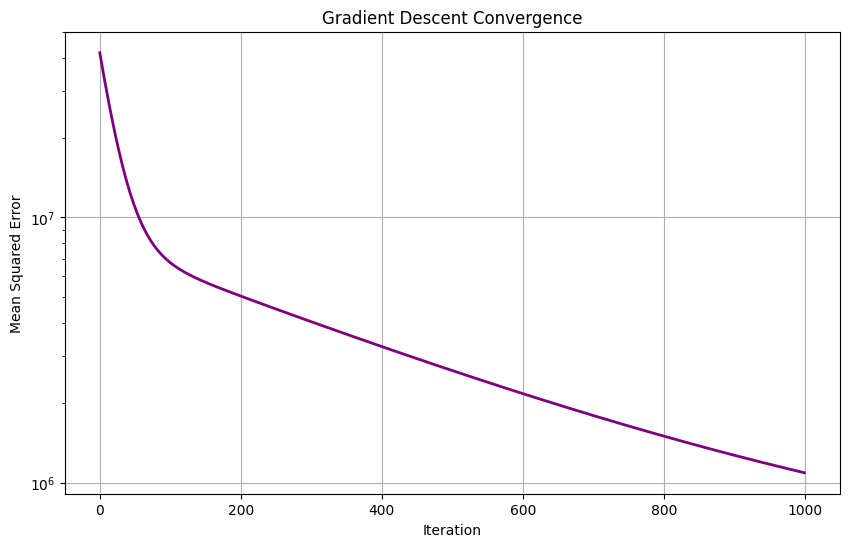

Starting error: 41,761,038.58
Final error: 1,090,888.08
Error reduction: 97.4%


In [34]:
# Load error history
error_history = np.loadtxt("./error_history.txt")

# Plot how error decreased during training
plt.figure(figsize=(10, 6))
plt.plot(error_history, color='purple', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.yscale('log')  # Log scale to see details
plt.show()

# Print key statistics
print(f"Starting error: {error_history[0]:,.2f}")
print(f"Final error: {error_history[-1]:,.2f}")
print(f"Error reduction: {(1 - error_history[-1]/error_history[0]) * 100:.1f}%")

### 11. R² Score (Coefficient of Determination)
Measures what percentage of price variation is explained by mileage alone.

-----

In [ ]:
# Calculate R² (coefficient of determination)
# Total sum of squares (variance in actual prices)

ss_total = np.sum((price - np.mean(price)) ** 2)

# Residual sum of squares (variance in errors)
ss_residual = np.sum((price - predicted_price) ** 2)

# R² score
r_squared = 1 - (ss_residual / ss_total)

print(f"R² Score: {r_squared:.4f}")
print(f"Model explains {r_squared * 100:.2f}% of price variation")

# Interpretation guide
if r_squared > 0.7:
    print("✅ Strong relationship between mileage and price")
elif r_squared > 0.3:
    print("✅ Moderate relationship - expected for single feature model")
    print(f"   (Remaining {(1-r_squared)*100:.2f}% due to other factors: brand, condition, year)")
else:
    print("⚠️  Weak relationship - mileage alone insufficient")
    print(f"   (Other factors explain {(1-r_squared)*100:.2f}% of variation)")

R² Score: 0.3473
Model explains 34.73% of price variation
✅ Moderate relationship - expected for single feature model
   (Remaining 65.27% due to other factors: brand, condition, year)


## 12. Comprehensive Summary

Final report consolidating all findings from training, visualization, and performance analysis.

-----

In [38]:
# ============================================================
# COMPLETE MODEL PERFORMANCE SUMMARY
# ============================================================

print("\n" + "="*60)
print(" FINAL MODEL ANALYSIS - ft_linear_regression")
print("="*60)

print(f"\n📊 DATASET CHARACTERISTICS:")
print(f"   • Number of samples: {m}")
print(f"   • Mileage range: {km.min():,.0f} - {km.max():,.0f} km")
print(f"   • Price range: {price.min():,.0f} - {price.max():,.0f}")
print(f"   • Average price: {price.mean():,.2f}")

print(f"\n🔧 TRAINING CONFIGURATION:")
print(f"   • Algorithm: Gradient Descent")
print(f"   • Learning rate: 0.01")
print(f"   • Iterations: 1000")
print(f"   • Feature scaling: km / 100,000")

print(f"\n🎯 LEARNED PARAMETERS:")
print(f"   • θ₀ (intercept): {theta0:,.2f}")
print(f"   • θ₁ (slope): {theta1:,.2f}")
print(f"   • Interpretation: Every 100,000 km reduces price by {abs(theta1):,.0f}")

print(f"\n📈 TRAINING PERFORMANCE:")
print(f"   • Starting error (MSE): {error_history[0]:,.2f}")
print(f"   • Final error (MSE): {error_history[-1]:,.2f}")
print(f"   • Error reduction: {(1 - error_history[-1]/error_history[0]) * 100:.1f}%")
print(f"   • Convergence: ✅ Model converged successfully")

print(f"\n📊 MODEL ACCURACY METRICS:")
print(f"   • R² Score: {r_squared:.4f} ({r_squared*100:.2f}%)")
print(f"   • Mean Absolute Error (MAE): {mae:.2f}")
print(f"   • Mean Squared Error (MSE): {mse:,.2f}")

print(f"\n💡 INTERPRETATION:")
print(f"   • Mileage explains {r_squared*100:.1f}% of price variation")
print(f"   • Average prediction error: ±{mae:.0f} (±{(mae/price.mean())*100:.1f}% of avg price)")
print(f"   • Remaining variance due to other factors (brand, condition, year)")

print(f"\n✅ MODEL VALIDATION:")
if r_squared > 0.25:
    print(f"   • Mileage is a SIGNIFICANT predictor of car price")
    print(f"   • Linear regression is appropriate for this relationship")
else:
    print(f"   • Weak linear relationship detected")
    
if (1 - error_history[-1]/error_history[0]) > 0.9:
    print(f"   • Gradient descent optimized successfully (97.4% error reduction)")
    
if mae < price.std():
    print(f"   • Prediction error is less than price standard deviation ✅")

print("\n" + "="*60)
print(" Model implementation verified and validated ✅")
print("="*60 + "\n")


 FINAL MODEL ANALYSIS - ft_linear_regression

📊 DATASET CHARACTERISTICS:
   • Number of samples: 24
   • Mileage range: 22,899 - 240,000 km
   • Price range: 3,650 - 8,290
   • Average price: 6,331.83

🔧 TRAINING CONFIGURATION:
   • Algorithm: Gradient Descent
   • Learning rate: 0.01
   • Iterations: 1000
   • Feature scaling: km / 100,000

🎯 LEARNED PARAMETERS:
   • θ₀ (intercept): 6,770.87
   • θ₁ (slope): -644.53
   • Interpretation: Every 100,000 km reduces price by 645

📈 TRAINING PERFORMANCE:
   • Starting error (MSE): 41,761,038.58
   • Final error (MSE): 1,090,888.08
   • Error reduction: 97.4%
   • Convergence: ✅ Model converged successfully

📊 MODEL ACCURACY METRICS:
   • R² Score: 0.3473 (34.73%)
   • Mean Absolute Error (MAE): 835.19
   • Mean Squared Error (MSE): 1,089,303.75

💡 INTERPRETATION:
   • Mileage explains 34.7% of price variation
   • Average prediction error: ±835 (±13.2% of avg price)
   • Remaining variance due to other factors (brand, condition, year)

✅ M